In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/updated-netflix-stock-price-all-time/netflix.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
df=pd.read_csv('/kaggle/input/updated-netflix-stock-price-all-time/netflix.csv')

In [11]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [12]:
df=df.drop(['Date','High','Low','Volume','Adj Close'],axis=1)

In [19]:
df

,Open,Close
0,1.156429,1.196429
1,1.214286,1.210000
2,1.213571,1.157143
3,1.164286,1.103571
4,1.107857,1.071429
...,...,...
4876,606.940002,634.809998
4877,628.179993,639.099976
4878,642.229980,631.849976
4879,634.169983,632.659973


In [14]:
df.isnull().sum()

Open     0
Close    0
dtype: int64

Text(0.5, 1.0, 'Stock Prices')

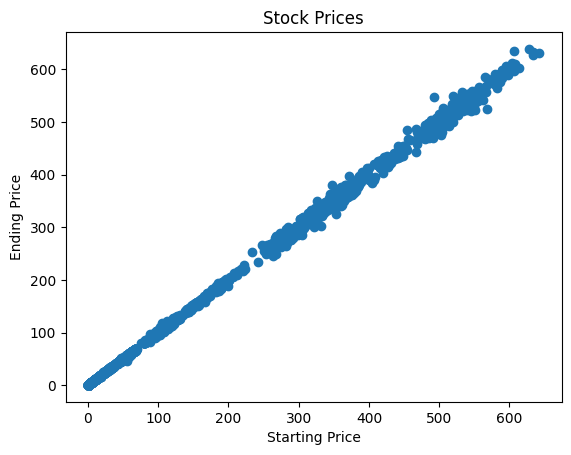

In [16]:
plt.scatter(df['Open'],df['Close'])
plt.xlabel('Starting Price')
plt.ylabel('Ending Price')
plt.title('Stock Prices')

In [20]:
x=df.drop('Close',axis=1)

In [21]:
x

,Open
0,1.156429
1,1.214286
2,1.213571
3,1.164286
4,1.107857
...,...
4876,606.940002
4877,628.179993
4878,642.229980
4879,634.169983


In [22]:
y=df['Close']

In [23]:
y

0         1.196429
1         1.210000
2         1.157143
3         1.103571
4         1.071429
           ...    
4876    634.809998
4877    639.099976
4878    631.849976
4879    632.659973
4880    627.039978
Name: Close, Length: 4881, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor=LinearRegression()

In [29]:
x.mean()

Open    105.388477
dtype: float64

In [30]:
y.mean()

105.43414864158366

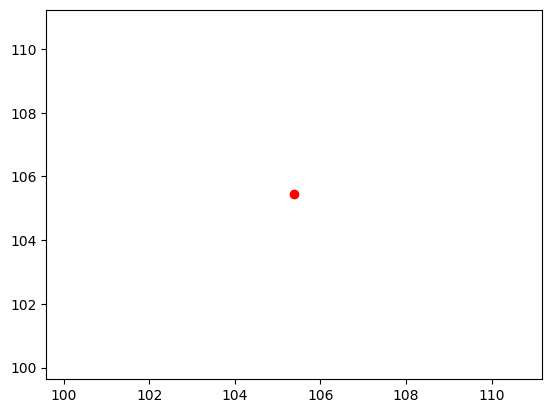

In [32]:
plt.scatter(x.mean(),y.mean(),color='red')

In [33]:
regressor.fit(x,y)

LinearRegression()

In [36]:
m=regressor.coef_
m

array([1.0001285])

In [37]:
c=regressor.intercept_
c

0.032128658062404725

In [38]:
#y=mx+c
m*650+c

array([650.11565514])

In [44]:
regressor.predict([[700]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([700.12208025])

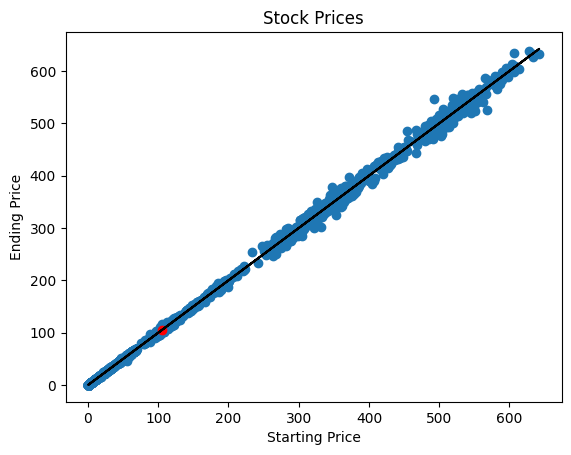

In [43]:
plt.plot(x,regressor.predict(x),color='black')

plt.scatter(df['Open'],df['Close'])
plt.xlabel('Starting Price')
plt.ylabel('Ending Price')
plt.title('Stock Prices')

plt.scatter(x.mean(),y.mean(),color='red')

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
mae=mean_absolute_error(y,regressor.predict(x))
mae

1.6119131236053417

In [45]:
from sklearn.metrics import r2_score

In [46]:
performance=r2_score(x,regressor.predict(x))*(100)

In [50]:
performance
print("Performance: {:.2f}%".format(performance))

Performance: 100.00%
